# Linear Regression

- **Libraries:** sklearn, numpy
- **Theorie/Algorithm:** https://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html

In [53]:
import numpy as np

In [70]:
class LinearRegression:
    def __init__(self, n_iterations, learning_rate=0.001, normalize=False, verbose=False):
        self.iterations = n_iterations
        self.learning_rate = learning_rate
        self.normalize = normalize
        self.verbose = verbose
        
        self.weights = None
        self._normalize_mean = None
        self._normalize_std = None
        self.error_history = list()

        
    def fit(self, X, y):  
        # Ensure data is float type
        X = X.astype(np.float32)
        y = y.astype(np.float32)
        
        if self.normalize:
            self._normalize_mean = X.mean()
            self._normalize_std = X.std()
            X = self._normalize(X)
            
        # bias term
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros((X.shape[1], 1))
        
        for i in range(self.iterations):
            # Calculating gradient
            pred = np.dot(X, self.weights)
            gradient = (1 / len(X)) * (np.dot(X.T, pred - y))
            # Updating weights
            self.weights = self.weights - self.learning_rate * gradient
            # Calculating current error
            error = self._mse(X, y)
            self.error_history.append(error)

            # logging the current error
            if self.verbose and i % 5000 == 0:
                print("Iteration: " + str(i) + ", Error: " + str(error))
    
    def predict(self, X):
        X = X.astype(np.float32)
        if self.normalize:
            X = self._normalize(X)
        X = np.insert(X, 0, 1, axis=1)
        pred = np.dot(X, self.weights)
        return pred
    
    # Helper functions
    def _normalize(self, X):
        return (X - self._normalize_mean) / self._normalize_std
        
    def _mse(self, X, y):
        pred = np.dot(X, self.weights)
        mean_square_error = (1 / (2 * len(X))) * np.sum(np.square(pred - y))
        return mean_square_error
    

### Generate Test Data

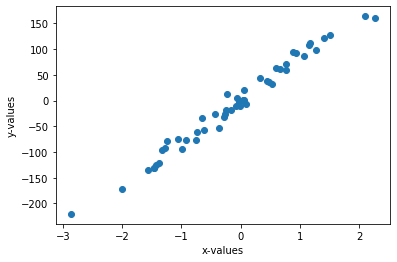

In [71]:
# Import libraries
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
 
# Get regression data from sklearn
X, y = datasets.make_regression(n_samples=50, n_features=1,  noise=10)
 
# Vizualize the generated data
plt.scatter(X, y)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.show()

### Linear Regression Example

In [72]:
# Creating and fitting the model
lr_model = LinearRegression(8000, normalize=True, verbose=True)
lr_model.fit(X, y)

Iteration: 0, Error: 194919.84360967777
Iteration: 5000, Error: 8.805181533171863


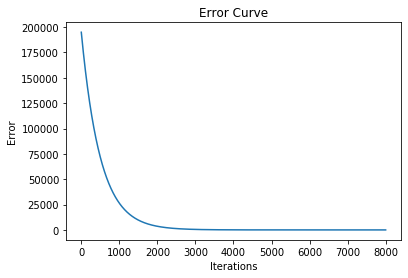

In [73]:
# Error Log
plt.plot(lr_model.error_history)
plt.title("Error Curve")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()